In [ ]:
# %%

from tool import *

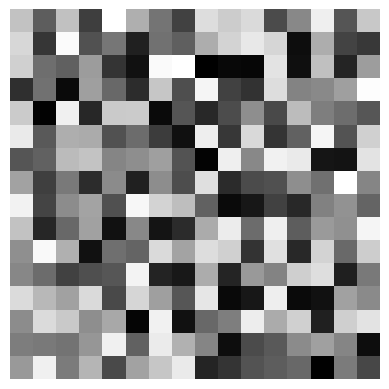

In [ ]:
# %% Output a 16x16 random image

img = np.random.randint(0, 256, (16, 16))
imshow(img)
imwrite(img, "L1_random.jpg")

Showing OpenCV Image


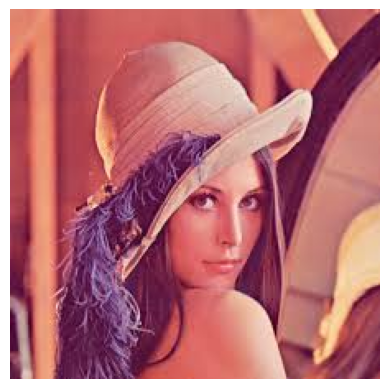

In [ ]:
# %% Converse to gray and binary version, show them

# Show the its red, green, blue componet
lena_color = imread("L1_lena_color.jpg")

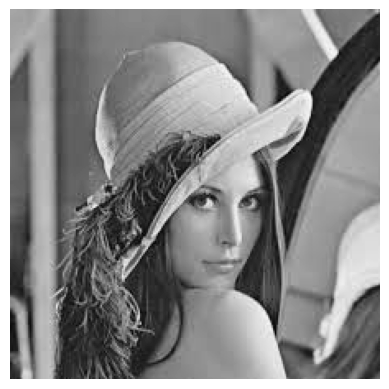

In [ ]:
# %%

lena_gray = cv2.cvtColor(lena_color, cv2.COLOR_BGR2GRAY)
imshow(lena_gray)
imwrite(lena_gray, "L1_lena_gray.jpg")

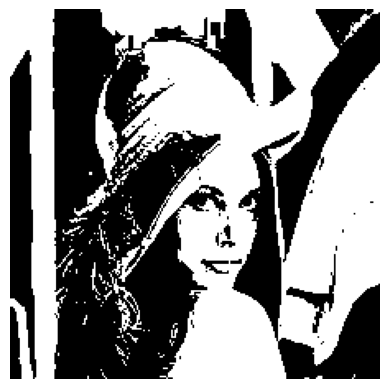

In [ ]:
# %%

lena_binary = cv2.threshold(lena_gray, 127, 255, cv2.THRESH_BINARY)[1]
imshow(lena_binary)
imwrite(lena_binary, "L1_lena_binary.jpg")

Showing OpenCV Image


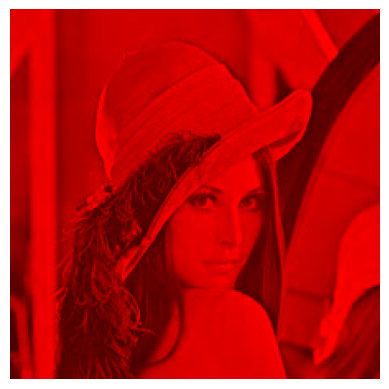

In [ ]:
# %% OpenCV 是 BGR 通道，所以红色通道是第 2 通道，绿色通道是第 1 通道，蓝色通道是第 0 通道

lena_red = lena_color.copy()
lena_red[:, :, 0] = 0
lena_red[:, :, 1] = 0
imshow(lena_red)
imwrite(lena_red, "L1_lena_red.jpg")

Showing OpenCV Image


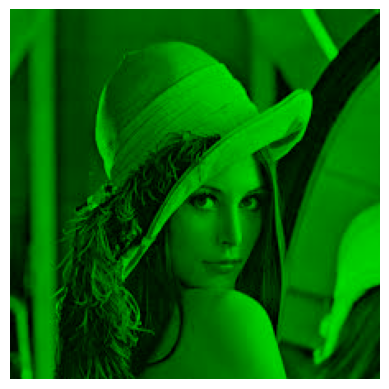

In [ ]:
# %%

lena_green = lena_color.copy()
lena_green[:, :, 0] = 0
lena_green[:, :, 2] = 0
imshow(lena_green)
imwrite(lena_green, "L1_lena_green.jpg")

Showing OpenCV Image


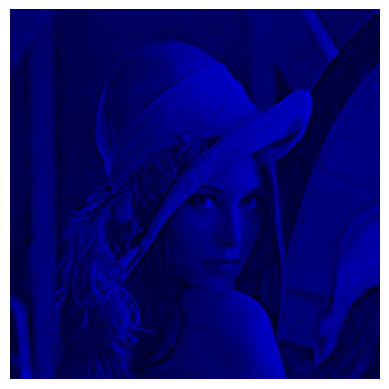

In [ ]:
# %%

lena_blue = lena_color.copy()
lena_blue[:, :, 1] = 0
lena_blue[:, :, 2] = 0
imshow(lena_blue)
imwrite(lena_blue, "L1_lena_blue.jpg")

Showing OpenCV Image


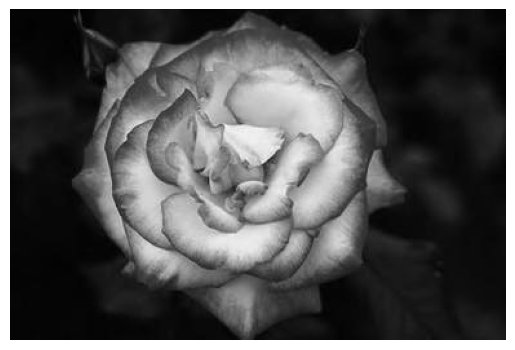

In [ ]:
# %% Input an gray image, output its bit planes

flower = imread("L1_flower.jpg")
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
imshow(flower)

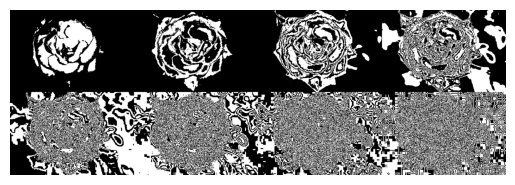

In [ ]:
# %% 将 bit plane 拼接在一张图像上

bit_planes = []
for i in range(8):
    bit_plane = (flower >> i) & 1
    bit_planes.append(bit_plane)

# 根据 layout 来排列 bit plane
layout = [
    [7, 6, 5, 4],
    [3, 2, 1, 0],
]

# 生成空白画布
canvas = np.zeros((flower.shape[0] * 2, flower.shape[1] * 4), np.uint8)

# 将 bit plane 拼接在画布上
for i in range(2):
    for j in range(4):
        canvas[
            i * flower.shape[0] : (i + 1) * flower.shape[0],
            j * flower.shape[1] : (j + 1) * flower.shape[1],
        ] = (
            bit_planes[layout[i][j]] * 255
        )

imshow(canvas)
imwrite(canvas, "L1_flower_bit_planes.jpg")

Showing OpenCV Image


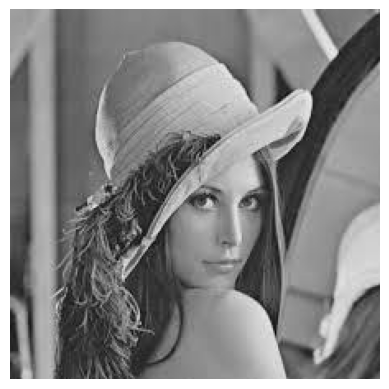

In [ ]:
# %%

"""
1. Do convolution using 3x3 mean filter
    Mask = [0.125 0.125 0.125
            0.125 0.125 0.125
            0.125 0.125 0.125]
2. Do convolution using 3x3 Laplacian filter
    Mask = [0 -1 0
            -1 4 -1
            0 -1 0]
"""
lena = imread("L1_lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

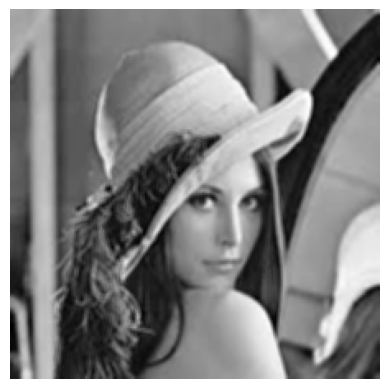

In [ ]:
# %% 3x3 mean filter

mean_filter = np.array(
    [[0.125, 0.125, 0.125], [0.125, 0.125, 0.125], [0.125, 0.125, 0.125]]
)
lena_mean = cv2.filter2D(lena, -1, mean_filter)
imshow(lena_mean)
imwrite(lena_mean, "L1_lena_mean.jpg")

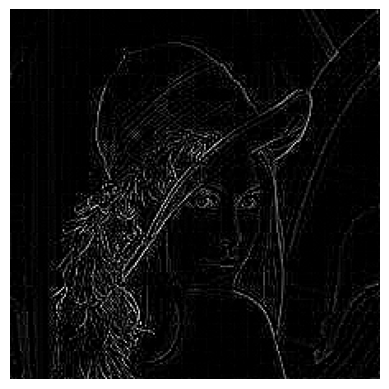

In [ ]:
# %% 3x3 Laplacian filter

laplacian_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
lena_laplacian = cv2.filter2D(lena, -1, laplacian_filter)
imshow(lena_laplacian)
imwrite(lena_laplacian, "L1_lena_laplacian.jpg")